In [1083]:
import pandas as pd
import numpy as np
import plotly.express as px
import random
import category_encoders as ce
import plotly.graph_objects as go

from sklearn.preprocessing import LabelEncoder
from sklearn.inspection import plot_partial_dependence
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from pdpbox import pdp, info_plots

In [1084]:
df = pd.read_csv('Amazon.csv')

In [1085]:
df.head()

,Index,ProductName,ScrapeDate,ScrapedIndex,ScrapedIndexTrueRank,CorrectedIndexTrueRank,ScrapedIndexPrice,CorrectedPrice,ScrapedIndexVendor,ScrapedIndexVendorType,BBScrapedPrice,BBVendorType,BBVendor,BBCorrectedPrice
0,0,#1 BEST Probiotic Supplement - 60 Day Supply w...,2016-06-14,2,2,1,20.99,20.99,Supplement Warriors,Other,-1.0,FBA,Sold by Sharp Nutrition and Fulfilled by Amazon.,25.02
1,1,#1 BEST Probiotic Supplement - 60 Day Supply w...,2016-06-14,1,1,2,19.99,25.02,Sharp Nutrition,FBA,-1.0,FBA,Sold by Sharp Nutrition and Fulfilled by Amazon.,25.02
2,2,"10 Panel Dip Drug Testing Kit, Test for 10 Dif...",2016-06-27,1,1,1,3.96,3.96,speedy tests,Other,4.9,FBA,Sold by Michael Minyety and Fulfilled by Amazon.,9.97
3,3,"10 Panel Dip Drug Testing Kit, Test for 10 Dif...",2016-06-27,2,1,1,3.96,3.96,Drug Abuse Control,Other,4.9,FBA,Sold by Michael Minyety and Fulfilled by Amazon.,9.97
4,4,"10 Panel Dip Drug Testing Kit, Test for 10 Dif...",2016-06-27,3,1,1,3.96,3.96,Lowest Priced Tests,Other,4.9,FBA,Sold by Michael Minyety and Fulfilled by Amazon.,9.97


In [1086]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6973 entries, 0 to 6972
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Index                   6973 non-null   int64  
 1   ProductName             6973 non-null   object 
 2   ScrapeDate              6973 non-null   object 
 3   ScrapedIndex            6973 non-null   int64  
 4   ScrapedIndexTrueRank    6973 non-null   int64  
 5   CorrectedIndexTrueRank  6973 non-null   int64  
 6   ScrapedIndexPrice       6973 non-null   float64
 7   CorrectedPrice          6973 non-null   float64
 8   ScrapedIndexVendor      6973 non-null   object 
 9   ScrapedIndexVendorType  6973 non-null   object 
 10  BBScrapedPrice          6973 non-null   float64
 11  BBVendorType            6973 non-null   object 
 12  BBVendor                6809 non-null   object 
 13  BBCorrectedPrice        6973 non-null   float64
dtypes: float64(4), int64(4), object(6)
memor

In [1087]:
df.isnull().sum()

Index                       0
ProductName                 0
ScrapeDate                  0
ScrapedIndex                0
ScrapedIndexTrueRank        0
CorrectedIndexTrueRank      0
ScrapedIndexPrice           0
CorrectedPrice              0
ScrapedIndexVendor          0
ScrapedIndexVendorType      0
BBScrapedPrice              0
BBVendorType                0
BBVendor                  164
BBCorrectedPrice            0
dtype: int64

In [1088]:
df[df['BBVendor'].isnull()]

,Index,ProductName,ScrapeDate,ScrapedIndex,ScrapedIndexTrueRank,CorrectedIndexTrueRank,ScrapedIndexPrice,CorrectedPrice,ScrapedIndexVendor,ScrapedIndexVendorType,BBScrapedPrice,BBVendorType,BBVendor,BBCorrectedPrice
19,19,2wayz FULL METAL BODY Garden Hose Splitter | Y...,2016-06-20,1,1,1,40.00,40.00,Irtenzia,Other,-1.0,O,NaN,9.97
20,20,2wayz FULL METAL BODY Garden Hose Splitter | Y...,2016-06-20,2,2,2,54.94,54.94,Mild Shop,Other,-1.0,O,NaN,9.97
1367,1367,Bushnell Powerview 7-15X25 Compact Zoom Binocular,2016-08-30,1,1,1,53.04,53.04,PORTABLE GUY,Other,-1.0,O,NaN,165.50
1368,1368,Bushnell Powerview 7-15X25 Compact Zoom Binocular,2016-08-30,2,2,2,54.41,54.41,TheXBOXking,Other,-1.0,O,NaN,165.50
1369,1369,Bushnell Powerview 7-15X25 Compact Zoom Binocular,2016-08-30,3,3,3,54.69,54.69,WebyShops,Other,-1.0,O,NaN,165.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5658,5658,"Regalo Swing Down Bedrail, White",2016-06-27,20,19,19,44.96,44.96,Mild Shop,Other,-1.0,O,NaN,35.34
5659,5659,"Regalo Swing Down Bedrail, White",2016-06-27,21,20,20,47.79,47.79,MidwestProductsDepot,Other,-1.0,O,NaN,35.34
5660,5660,"Regalo Swing Down Bedrail, White",2016-06-27,22,21,21,47.90,47.90,Fairy Bless,Other,-1.0,O,NaN,35.34
5661,5661,"Regalo Swing Down Bedrail, White",2016-06-27,23,22,22,53.96,53.96,RevoSync,Other,-1.0,O,NaN,35.34


In [1089]:
null_values = df[df['BBVendor'].isnull()]
null_values.groupby('ScrapedIndexVendorType').count()

#Some BBVendor in FBA, mostly in Other

,Index,ProductName,ScrapeDate,ScrapedIndex,ScrapedIndexTrueRank,CorrectedIndexTrueRank,ScrapedIndexPrice,CorrectedPrice,ScrapedIndexVendor,BBScrapedPrice,BBVendorType,BBVendor,BBCorrectedPrice
ScrapedIndexVendorType,,,,,,,,,,,,,
FBA,14,14,14,14,14,14,14,14,14,14,14,0,14
Other,150,150,150,150,150,150,150,150,150,150,150,0,150


In [1090]:
df.groupby("ScrapedIndexVendorType")['BBScrapedPrice'].describe()

#Min BB scraped price at -1.0?

,count,mean,std,min,25%,50%,75%,max
ScrapedIndexVendorType,,,,,,,,
Amazon,192.0,45.226979,87.197381,-1.0,9.9775,18.765,44.21,698.0
FBA,409.0,50.194059,110.563688,-1.0,7.8500,13.220,40.72,698.0
Other,6372.0,35.134617,56.193643,-1.0,8.9900,15.095,36.99,698.0


In [1091]:
df.groupby("ScrapedIndexVendorType")['BBCorrectedPrice'].describe()

#Min BB corrected price at 0.0?

,count,mean,std,min,25%,50%,75%,max
ScrapedIndexVendorType,,,,,,,,
Amazon,192.0,55.216979,88.876966,5.0,16.915,26.285,56.77,706.11
FBA,409.0,58.090782,111.468509,0.0,14.060,22.410,47.92,706.11
Other,6372.0,44.757938,58.489347,0.0,15.790,23.340,47.92,706.11


In [1092]:
df = df.drop(columns = 'BBScrapedPrice')
df = df.drop(columns = 'BBVendor')
df = df.drop(columns = 'BBCorrectedPrice')
df = df.drop(columns = 'Index')
df = df.drop(columns = 'ScrapedIndexVendor')
df = df.drop(columns = 'ScrapeDate') #data scraped same day for same product, all data scraped summer months of same year

# Data Visualization

Areas to examine:
How does vendor type affect rank? 
How does rank affect an item's price? Or vice versa?

In [1093]:
amazon = df[df['BBVendorType'].str.contains("Amazon")]
fba = df[df['BBVendorType'].str.contains("FBA")]
other = df[df['BBVendorType'].str.contains("O")]

In [1094]:
x0 = amazon['ScrapedIndex']
x1 = amazon['CorrectedIndexTrueRank']

fig = go.Figure()
fig.add_trace(go.Histogram(x=amazon['ScrapedIndex']))
fig.add_trace(go.Histogram(x=amazon['CorrectedIndexTrueRank']))

fig.update_layout(
    barmode='overlay', title='Amazon: Index Rank for Scraped Index vs. Corrected Index' 
)
fig.update_traces(opacity=0.20)
fig.show()


In [1095]:
x0 = fba['ScrapedIndex']
x1 = fba['CorrectedIndexTrueRank']

fig = go.Figure()
fig.add_trace(go.Histogram(x=x0))
fig.add_trace(go.Histogram(x=x1))

fig.update_layout(barmode='overlay', title='Fulfilled by Amazon: Index Rank for Scraped Index vs. Corrected Index' )
fig.update_traces(opacity=0.20)
fig.show()

In [1096]:
x0 = other['ScrapedIndex']
x1 = other['CorrectedIndexTrueRank']

fig = go.Figure()
fig.add_trace(go.Histogram(x=x0))
fig.add_trace(go.Histogram(x=x1))

fig.update_layout(barmode='overlay', title='Other Vendors: Index Rank for Scraped Index vs. Corrected Index' )
fig.update_traces(opacity=0.20)
fig.show()

In [1097]:
df.groupby("ScrapedIndexVendorType")['ScrapedIndex'].describe()

,count,mean,std,min,25%,50%,75%,max
ScrapedIndexVendorType,,,,,,,,
Amazon,192.0,1.760417,1.600031,1.0,1.0,1.0,2.0,12.0
FBA,409.0,8.567237,8.671624,1.0,3.0,6.0,11.0,78.0
Other,6372.0,26.800847,23.848052,1.0,9.0,19.0,37.0,162.0


In [1098]:
df.groupby("ScrapedIndexVendorType")['CorrectedIndexTrueRank'].describe()

,count,mean,std,min,25%,50%,75%,max
ScrapedIndexVendorType,,,,,,,,
Amazon,192.0,6.864583,6.690025,1.0,2.0,5.0,9.0,39.0
FBA,409.0,13.679707,10.668012,1.0,6.0,11.0,18.0,75.0
Other,6372.0,22.507847,19.531792,1.0,7.0,16.0,33.0,107.0


In [1099]:
#Ranking of vendor type "Other" improved after correction

In [1100]:
fig = px.scatter(df[:45], x="ScrapedIndex", y="ScrapedIndexPrice", color="ProductName")
fig.show()

In [1101]:
#(non corrected) As price increases, index increases

# Model Validation, Data Encoding, Model Tuning

In [1102]:
#We are going to predict scraped index (non-corrected)

df_scraped_index = df
df_scraped_index = df_scraped_index.drop(columns = 'ScrapedIndexTrueRank')
df_scraped_index = df_scraped_index.drop(columns = 'CorrectedIndexTrueRank')

#dropped columns because I want to predict index based on product, price, and seller 

ids = df_scraped_index["ProductName"].unique()
random.shuffle(ids)
df_scraped_index = df_scraped_index.set_index("ProductName").loc[ids].reset_index()

y = df_scraped_index['ScrapedIndex']
X = df_scraped_index.drop('ScrapedIndex', axis=1)

In [1103]:
#Split the Dataset into Training/Validation/Test

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, shuffle=False)


In [1104]:
gbm = GradientBoostingRegressor()
te = ce.TargetEncoder()
ore = ce.OrdinalEncoder()
ohe = ce.OneHotEncoder()

pipe1 = make_pipeline(te, gbm)
pipe2 = make_pipeline(ore, gbm)
pipe3 = make_pipeline(ohe, gbm)

In [1105]:
pipe1.fit(X_train, y_train)
pipe1.score(X_val,y_val)

-0.15286180605997868

In [1106]:
pipe2.fit(X_train, y_train)
pipe2.score(X_val,y_val)

-0.10797953536605731

In [1107]:
pipe3.fit(X_train, y_train)
pipe3.score(X_val,y_val)

0.19883163802783288

In [1108]:
#continue with target encoder- good for categorical data (vendor is Amazon, FBA, or other?) and also one hot encoder takes forever to process
pipe1.fit(X_train, y_train)
pipe1.score(X_val,y_val)

-0.15359527541884477

In [1109]:
gbm.feature_importances_

array([7.22744806e-01, 1.74508980e-01, 7.58830389e-02, 2.66419186e-02,
       2.21255719e-04])

In [1110]:
importances = pd.DataFrame({
    'Column': X.columns,
    'Importance': gbm.feature_importances_
}).sort_values(by='Importance', ascending=False)

importances

,Column,Importance
0,ProductName,0.722745
1,ScrapedIndexPrice,0.174509
2,CorrectedPrice,0.075883
3,ScrapedIndexVendorType,0.026642
4,BBVendorType,0.000221


In [1111]:
#We are going to predict corrected true index 
df_corrected_index = df
df_corrected_index = df_corrected_index.drop(columns = 'ScrapedIndex')
df_corrected_index = df_corrected_index.drop(columns = 'ScrapedIndexTrueRank')

#dropped columns because I want to predict index based on product, price, and seller 


ids = df_corrected_index["ProductName"].unique()
random.shuffle(ids)
df_corrected_index = df_corrected_index.set_index("ProductName").loc[ids].reset_index()



y = df_corrected_index['CorrectedIndexTrueRank']
X = df_corrected_index.drop('CorrectedIndexTrueRank', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, shuffle=False)

In [1112]:
pipe1.fit(X_train, y_train)
pipe1.score(X_val,y_val)

0.19072847389070202

In [1113]:
pipe2.fit(X_train, y_train)
pipe2.score(X_val,y_val)

-0.009366587250115188

In [1114]:
pipe3.fit(X_train, y_train)
pipe3.score(X_val,y_val)

0.12997563013704172

In [1115]:
pipe1.fit(X_train, y_train)
pipe1.score(X_val,y_val)

0.19063619749570004

In [1116]:
gbm.feature_importances_

importances = pd.DataFrame({
    'Column': X.columns,
    'Importance': gbm.feature_importances_
}).sort_values(by='Importance', ascending=False)

importances

,Column,Importance
0,ProductName,0.706471
2,CorrectedPrice,0.150952
1,ScrapedIndexPrice,0.137307
3,ScrapedIndexVendorType,0.005271
4,BBVendorType,0.000000


In [1117]:
#Let's also predict price (scraped index price and corrected price)

df_scraped_index_price = df
df_scraped_index_price = df_scraped_index_price.drop(columns = 'CorrectedPrice')

#dropped column because I want to predict price based on product, index, and seller 

ids = df_scraped_index_price["ProductName"].unique()
random.shuffle(ids)
df_scraped_index_price = df_scraped_index_price.set_index("ProductName").loc[ids].reset_index()

y = df_scraped_index_price['ScrapedIndexPrice']
X = df_scraped_index_price.drop('ScrapedIndexPrice', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, shuffle=False)

In [1118]:
pipe1.fit(X_train, y_train)
pipe1.score(X_val,y_val)

-0.393916057904131

In [1119]:
pipe2.fit(X_train, y_train)
pipe2.score(X_val,y_val)

-3.7678872067768747

In [1120]:
pipe3.fit(X_train, y_train)
pipe3.score(X_val,y_val)

0.006410930294695194

In [1121]:
pipe1.fit(X_train, y_train)
pipe1.score(X_val,y_val)

-0.3943303957954758

In [1122]:
gbm.feature_importances_

importances = pd.DataFrame({
    'Column': X.columns,
    'Importance': gbm.feature_importances_
}).sort_values(by='Importance', ascending=False)

importances

,Column,Importance
0,ProductName,0.977375
3,CorrectedIndexTrueRank,0.008326
1,ScrapedIndex,0.008182
2,ScrapedIndexTrueRank,0.004872
5,BBVendorType,0.001127
4,ScrapedIndexVendorType,0.000119


In [1123]:
df_corrected_index_price = df
df_corrected_index_price = df_corrected_index_price.drop(columns = 'ScrapedIndexPrice')

#dropped column because I want to predict price based on product, index, and seller 

ids = df_corrected_index_price["ProductName"].unique()
random.shuffle(ids)
df_corrected_index_price = df_corrected_index_price.set_index("ProductName").loc[ids].reset_index()

y = df_corrected_index_price['CorrectedPrice']
X = df_corrected_index_price.drop('CorrectedPrice', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, shuffle=False)

In [1124]:
pipe1.fit(X_train, y_train)
pipe1.score(X_val,y_val)

-0.19897923181706134

In [1125]:
pipe2.fit(X_train, y_train)
pipe2.score(X_val,y_val)

-1.1903435669616655

In [1126]:
pipe3.fit(X_train, y_train)
pipe3.score(X_val,y_val)

-0.017484405189517105

In [1127]:
pipe1.fit(X_train, y_train)
pipe1.score(X_val,y_val)

-0.19979859074039452

In [1128]:
gbm.feature_importances_

importances = pd.DataFrame({
    'Column': X.columns,
    'Importance': gbm.feature_importances_
}).sort_values(by='Importance', ascending=False)

importances

,Column,Importance
0,ProductName,0.977446
3,CorrectedIndexTrueRank,0.016654
1,ScrapedIndex,0.003770
5,BBVendorType,0.001472
2,ScrapedIndexTrueRank,0.000492
4,ScrapedIndexVendorType,0.000165


In [1129]:
#Let's focus on predicting scraped index (non-corrected). It had the best score and maybe we can improve on it. 
#Adding a column for average price per ProductName 
#Adding a column for median rank per ProductName

df_scraped_index = df
df_scraped_index = df_scraped_index.drop(columns = 'ScrapedIndexTrueRank')
df_scraped_index = df_scraped_index.drop(columns = 'CorrectedIndexTrueRank')

df_scraped_index['avg_price'] = df_scraped_index.groupby('ProductName')['ScrapedIndexPrice'].transform('mean')
df_scraped_index['med_rank'] = df_scraped_index.groupby('ProductName')['ScrapedIndex'].transform('median')


df_scraped_index.head()

ids = df_scraped_index["ProductName"].unique()
random.shuffle(ids)
df_scraped_index = df_scraped_index.set_index("ProductName").loc[ids].reset_index()

y = df_scraped_index['ScrapedIndex']
X = df_scraped_index.drop('ScrapedIndex', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, shuffle=False)

pipe1.fit(X_train, y_train)
pipe1.score(X_val,y_val)

0.39061357787559337

In [1130]:
gbm.feature_importances_

importances = pd.DataFrame({
    'Column': X.columns,
    'Importance': gbm.feature_importances_
}).sort_values(by='Importance', ascending=False)

importances

,Column,Importance
6,med_rank,0.325632
0,ProductName,0.248505
1,ScrapedIndexPrice,0.202827
5,avg_price,0.151763
2,CorrectedPrice,0.050797
3,ScrapedIndexVendorType,0.020456
4,BBVendorType,0.000019


In [1131]:
#Model tuning for predicting scraped index (non-corrected). It had the best score and maybe we can improve on it.

ids = df_scraped_index["ProductName"].unique()
random.shuffle(ids)
df_scraped_index = df_scraped_index.set_index("ProductName").loc[ids].reset_index()

y = df_scraped_index['ScrapedIndex']
X = df_scraped_index.drop('ScrapedIndex', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, shuffle=False)

n_estimators  = [100, 250, 500]
learning_rate = [.05, .1, .2]
max_depth     = [3, 4, 5, 6]
cv_scores     = []

for estimators in n_estimators:
    for rate in learning_rate:
        for depth in max_depth:
            print(f"Fitting model with parameters:  n_estimators - {estimators}, learning_rate - {rate}, max_depth - {depth}")
            mod   = GradientBoostingRegressor(n_estimators=estimators, learning_rate=rate, max_depth=depth, max_features=0.6)
            pipe_mod  = make_pipeline(ce.TargetEncoder(), mod)
            pipe_mod.fit(X_train, y_train)
            score = pipe_mod.score(X_val, y_val)
            print(f"Scoree: {score}")
            cv_scores.append((score, estimators, rate, depth))
            
#default parameters still show best score

Fitting model with parameters:  n_estimators - 100, learning_rate - 0.05, max_depth - 3
Scoree: 0.12444140200580123
Fitting model with parameters:  n_estimators - 100, learning_rate - 0.05, max_depth - 4
Scoree: 0.13764773827517063
Fitting model with parameters:  n_estimators - 100, learning_rate - 0.05, max_depth - 5
Scoree: 0.08085330464597285
Fitting model with parameters:  n_estimators - 100, learning_rate - 0.05, max_depth - 6
Scoree: 0.16662904580522797
Fitting model with parameters:  n_estimators - 100, learning_rate - 0.1, max_depth - 3
Scoree: 0.20980486152472722
Fitting model with parameters:  n_estimators - 100, learning_rate - 0.1, max_depth - 4
Scoree: -0.021301126965485917
Fitting model with parameters:  n_estimators - 100, learning_rate - 0.1, max_depth - 5
Scoree: 0.09759418287000465
Fitting model with parameters:  n_estimators - 100, learning_rate - 0.1, max_depth - 6
Scoree: 0.1498289494620212
Fitting model with parameters:  n_estimators - 100, learning_rate - 0.2, ma

In [1132]:
#Fit without validation set

ids = df_scraped_index["ProductName"].unique()
random.shuffle(ids)
df_scraped_index = df_scraped_index.set_index("ProductName").loc[ids].reset_index()

y = df_scraped_index['ScrapedIndex']
X = df_scraped_index.drop('ScrapedIndex', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

pipe1.fit(X_train, y_train)
pipe1.score(X_test, y_test)

0.3941096637626378

In [1133]:
#Still would like to see relationship with price

df_corrected_index_price = df
df_corrected_index_price['avg_price'] = df_corrected_index_price.groupby('ProductName')['ScrapedIndexPrice'].transform('mean')
df_corrected_index_price['med_rank'] = df_corrected_index_price.groupby('ProductName')['ScrapedIndex'].transform('median')
df_corrected_index_price = df_corrected_index_price.drop(columns = 'ScrapedIndexPrice')

#dropped column because I want to predict price based on product, index, and seller 

ids = df_corrected_index_price["ProductName"].unique()
random.shuffle(ids)
df_corrected_index_price = df_corrected_index_price.set_index("ProductName").loc[ids].reset_index()

y = df_corrected_index_price['CorrectedPrice']
X = df_corrected_index_price.drop('CorrectedPrice', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, shuffle=False)

pipe1.fit(X_train, y_train)
pipe1.score(X_val,y_val)

0.7852777022788828

In [1134]:
ids = df_corrected_index_price["ProductName"].unique()
random.shuffle(ids)
df_corrected_index_price = df_corrected_index_price.set_index("ProductName").loc[ids].reset_index()

y = df_corrected_index_price['CorrectedPrice']
X = df_corrected_index_price.drop('CorrectedPrice', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

pipe1.fit(X_train, y_train)
pipe1.score(X_test, y_test)

0.8213021115922656

# Post Morten Analysis

In [1135]:
pipe1

Pipeline(steps=[('targetencoder',
                 TargetEncoder(cols=['ProductName', 'ScrapedIndexVendorType',
                                     'BBVendorType'])),
                ('gradientboostingregressor', GradientBoostingRegressor())])

In [1136]:
X = df_corrected_index_price.drop('CorrectedPrice', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

transformedX_corrected_price = pipe1[0].transform(X_train)

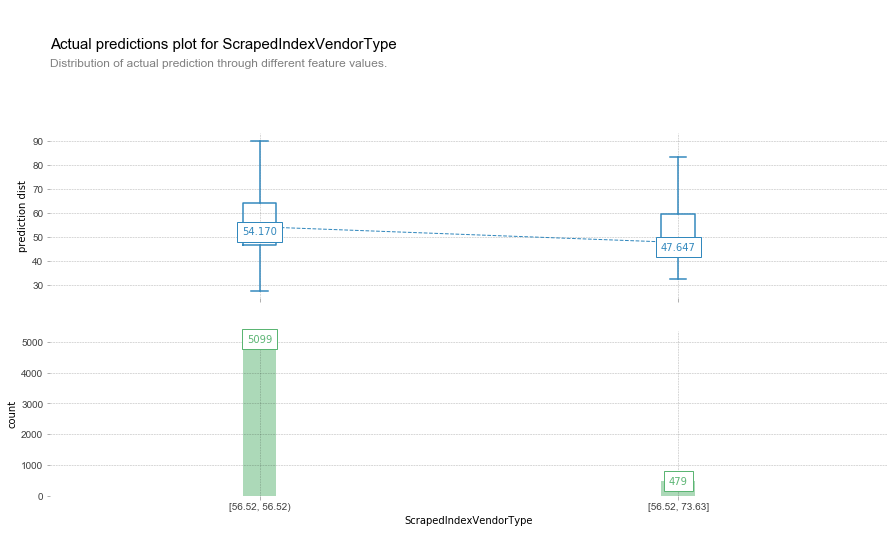

In [1141]:
fig, axes, df_corrected_index_price = info_plots.actual_plot(
    model=pipe1, X=transformedX_corrected_price, 
    feature='ScrapedIndexVendorType', feature_name = 'ScrapedIndexVendorType', predict_kwds={}
)

#Amazon and FBA vs. Other vendor type; price increases

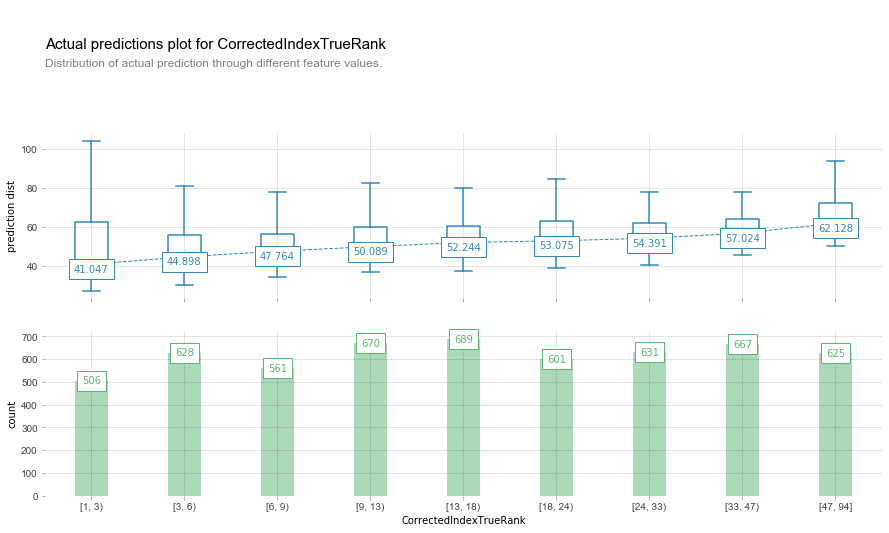

In [1138]:
fig, axes, df_corrected_index_price = info_plots.actual_plot(
    model=pipe1, X=transformedX_corrected_price, 
    feature='CorrectedIndexTrueRank', feature_name = 'CorrectedIndexTrueRank', predict_kwds={}
)

#Price increases as corrected index rank increases

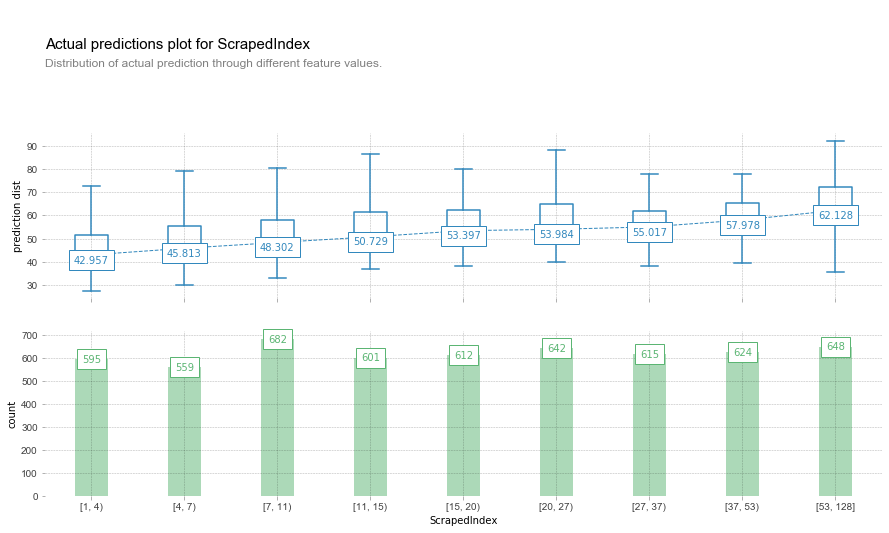

In [1139]:
fig, axes, df_corrected_index_price = info_plots.actual_plot(
    model=pipe1, X=transformedX_corrected_price, 
    feature='ScrapedIndex', feature_name = 'ScrapedIndex', predict_kwds={}
)
#Prices increase, but with wider variablility as Amazon scraped index increases